In [11]:
import cv2
import os
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 



In [13]:
BASE_PATH = "../data/SkinDisease/train"

disease_class = os.listdir(BASE_PATH)

print(disease_class)

['Acne', 'Actinic_Keratosis', 'Benign_tumors', 'Bullous', 'Candidiasis', 'DrugEruption', 'Eczema', 'Infestations_Bites', 'Lichen', 'Lupus', 'Moles', 'Psoriasis', 'Rosacea', 'Seborrh_Keratoses', 'SkinCancer', 'Sun_Sunlight_Damage', 'Tinea', 'Unknown_Normal', 'Vascular_Tumors', 'Vasculitis', 'Vitiligo', 'Warts']


In [20]:
# Extracting sample of data and visualise 

def load_image(BASE_PATH, classes, n=5):
    for cls_idx, cls in enumerate(classes[:5]):
        cls_path = os.path.join(BASE_PATH, cls)
        img_list = os.listdir(cls_path)[:n]

        for idx,img in enumerate(img_list):
            img_path = os.path.join(cls_path, img)
            image = cv2.imread(img_path, cv2.COLOR_BGR2RGB)

            plt.subplot(5, n, cls_idx*n + idx +1)
            plt.imshow(image)

            if idx == 0:
                plt.ylabel(cls)
    
plt.tight_layout()
plt.suptitle("Sample of each skin diseases")
plt.show()

<Figure size 640x480 with 0 Axes>

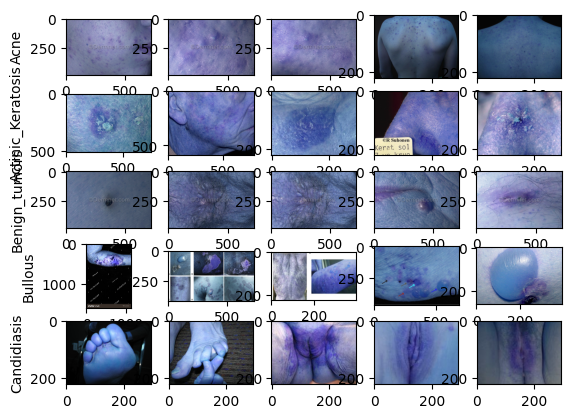

In [21]:
load_image(BASE_PATH, disease_class, 5)

In [26]:
# Checking imbalance in data                                     

disease = {}

for cls in disease_class:
    cls_path = os.path.join(BASE_PATH, cls)
    img_list = os.listdir(cls_path)

    disease[cls] = len(img_list)



In [27]:
print(disease)

{'Acne': 593, 'Actinic_Keratosis': 748, 'Benign_tumors': 1093, 'Bullous': 504, 'Candidiasis': 248, 'DrugEruption': 547, 'Eczema': 1010, 'Infestations_Bites': 524, 'Lichen': 553, 'Lupus': 311, 'Moles': 361, 'Psoriasis': 820, 'Rosacea': 254, 'Seborrh_Keratoses': 455, 'SkinCancer': 693, 'Sun_Sunlight_Damage': 312, 'Tinea': 923, 'Unknown_Normal': 1651, 'Vascular_Tumors': 543, 'Vasculitis': 461, 'Vitiligo': 714, 'Warts': 580}


In [22]:
# Checking the size of images
img_size = []

for cls in disease_class:
    cls_path = os.path.join(BASE_PATH, cls)
    img_list = os.listdir(cls_path)[:40]

    for img in img_list:
        img_path = os.path.join(cls_path, img)
        image = cv2.imread(img_path, cv2.COLOR_BGR2RGB)

        img_size.append(image.shape)



In [23]:
from collections import Counter

size_count = Counter(img_size)

print(size_count)

Counter({(222, 294, 3): 341, (472, 720, 3): 148, (480, 720, 3): 41, (720, 480, 3): 40, (720, 472, 3): 22, (474, 720, 3): 20, (225, 225, 3): 12, (464, 720, 3): 10, (183, 275, 3): 10, (168, 300, 3): 8, (720, 464, 3): 6, (471, 720, 3): 6, (484, 720, 3): 6, (194, 259, 3): 6, (720, 474, 3): 5, (465, 720, 3): 5, (540, 720, 3): 5, (720, 473, 3): 4, (1101, 1500, 3): 4, (720, 489, 3): 3, (491, 720, 3): 3, (492, 720, 3): 3, (720, 468, 3): 3, (489, 720, 3): 3, (720, 478, 3): 3, (478, 720, 3): 3, (174, 290, 3): 3, (416, 416, 3): 3, (720, 470, 3): 3, (490, 720, 3): 2, (483, 720, 3): 2, (475, 720, 3): 2, (720, 476, 3): 2, (601, 720, 3): 2, (473, 720, 3): 2, (253, 380, 3): 2, (1093, 1500, 3): 2, (493, 720, 3): 2, (720, 484, 3): 2, (720, 486, 3): 2, (463, 720, 3): 2, (507, 720, 3): 2, (720, 485, 3): 2, (488, 720, 3): 2, (249, 202, 3): 2, (168, 299, 3): 2, (251, 201, 3): 2, (467, 720, 3): 2, (495, 720, 3): 2, (360, 640, 3): 2, (100, 100, 3): 2, (510, 750, 3): 1, (587, 788, 3): 1, (380, 261, 3): 1, (358

In [24]:
# Getting Pixel Range of the images

pixel = []

for cls in disease_class:
    cls_path = os.path.join(BASE_PATH, cls)
    img_list = os.listdir(cls_path)[:40]

    for img in img_list:
        img_path = os.path.join(cls_path, img)
        image = cv2.imread(img_path, cv2.COLOR_BGR2RGB)

        pixel.append(image.ravel())
        

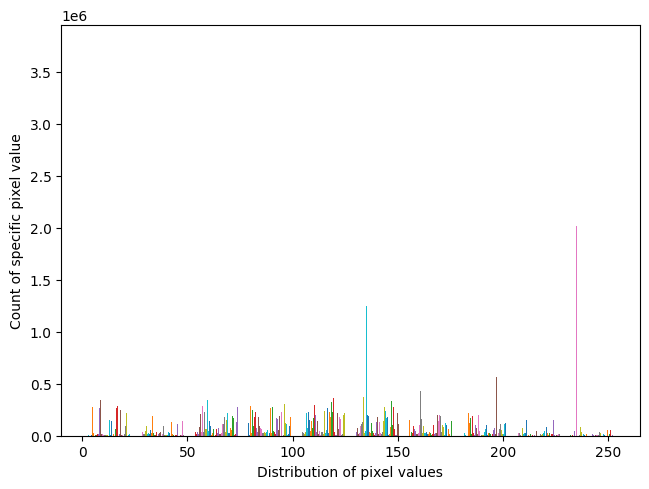

In [25]:
plt.hist(pixel)
plt.tight_layout()
plt.xlabel("Distribution of pixel values")
plt.ylabel("Count of specific pixel value")
plt.show()